# **Exploratory Data Analysis (EDA) of Selected Tech Stocks (2022-2024)**

This notebook performs exploratory data analysis (EDA) on historical stock prices of four major technology companies: Microsoft (MSFT), Apple (AAPL), Google (GOOGL), and NVIDIA (NVDA).

The data is fetched directly from Yahoo Finance using the `yfinance` Python library, covering the period from January 1, 2022, to December 31, 2024.

The analysis aims to understand price trends, volatility, and trading volume patterns for each stock, as well as to compare their performance and risk characteristics.

Key steps include:

- Downloading and inspecting stock data  
- Descriptive statistics and data quality checks  
- Visualizing price movements and trading volumes  
- Calculating daily returns and analyzing their distribution  
- Assessing volatility and identifying outliers  
- Saving important plots for reporting and further analysis  

This analysis provides insights useful for investors, analysts, and anyone interested in stock behavior over time.



In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Create reports folder if not exist
os.makedirs('reports', exist_ok=True)

# MSFT: Microsoft, AAPL: Apple, GOOGL: Google, NVDA: NVIDIA
tickers = ['MSFT', 'AAPL', 'GOOGL', 'NVDA']

labels = ['Microsoft', 'Apple', 'Google', 'NVIDIA']

# Load data from 2022 to 2024 only get Close Price
data = yf.download(tickers, start='2022-01-01', end='2025-01-01')['Close']

print("\nMissing values per ticker:")
print(data.isnull().sum())

print("\nDescriptive statistics:")
print(data.describe())

# Remove rows containing NaN values
data.dropna(inplace = True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


Missing values per ticker:
Ticker
AAPL     0
GOOGL    0
MSFT     0
NVDA     0
dtype: int64

Descriptive statistics:
Ticker        AAPL       GOOGL        MSFT        NVDA
count   753.000000  753.000000  753.000000  753.000000
mean    176.563681  131.789951  329.669792   54.391689
std      29.570501   27.283039   71.336390   42.173985
min     123.421249   82.932625  209.393265   11.214940
25%     153.871674  109.682198  265.680725   19.561003
50%     171.708893  130.745865  320.929718   41.891582
75%     190.167389  150.964600  406.484711   87.728165
max     258.396667  196.196259  464.002472  148.856064


# **Closing Prices Over Time (2022-2024)**

This chart shows the historical closing prices of Microsoft, Apple, Google and NVIDIA for the 2 years 2022 to 2024..  
It helps visualize the overall trend and growth patterns of these tech stocks.

Summary:


*   Trend: The long-term trend of 4 companies is an upward trend in closing prices between 2022 and 2024.
*   Volatility: Volatility: Apple and Google (suitable for venture investors) are more volatile than Microsoft and NVIDIA (suitable for conservative investors).



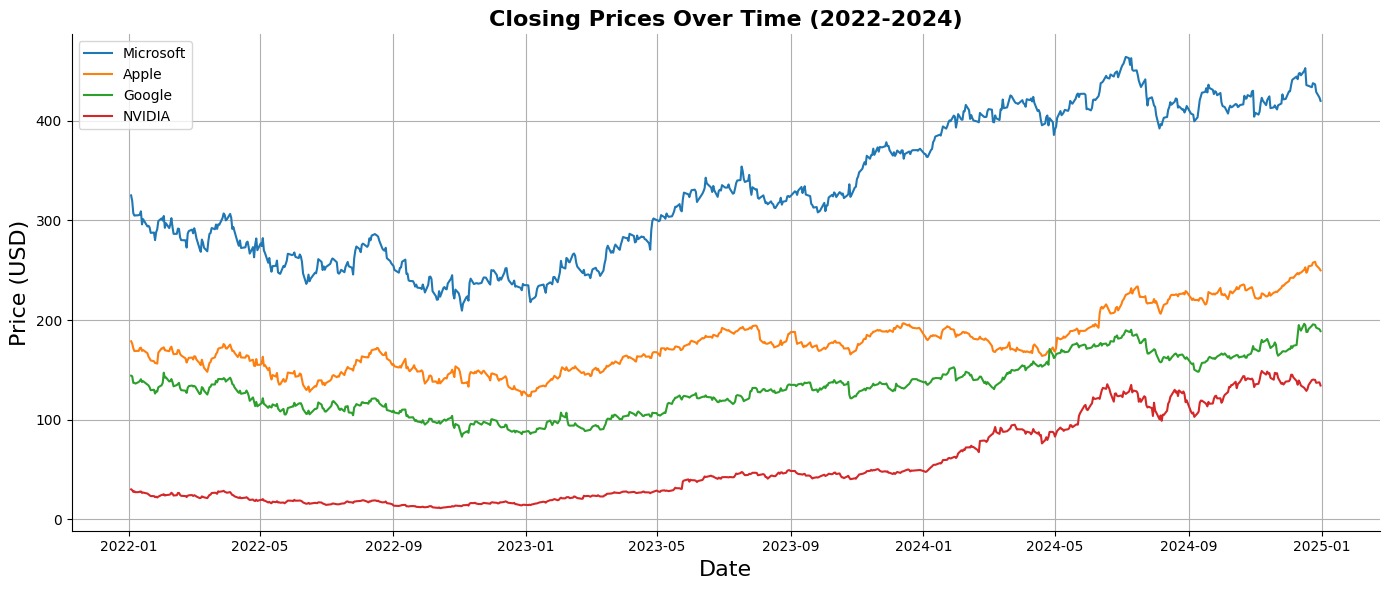

In [3]:
# Analyze closing price trends over time 2022 to 2024
plt.figure(figsize = (14, 6))
for ticker, label in zip(tickers,  labels):
  plt.plot(data[ticker], label = label)
plt.legend()
plt.title("Closing Prices Over Time (2022-2024)", fontsize = 16, fontweight = 'bold')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Price (USD)', fontsize = 16)
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.savefig('reports/closing_prices_2022_2024.png')
plt.show()

# **Daily Log Returns (May - Aug 2024)**

Daily Log Returns show daily return volatility.

Summary:


*   Microsoft and NVIDIA tend to be more stable in daily returns, with less large swings and short-term volatility.
*   Apple and Google are more volatile, with periods of sharp increases and decreases and large short-term volatility.



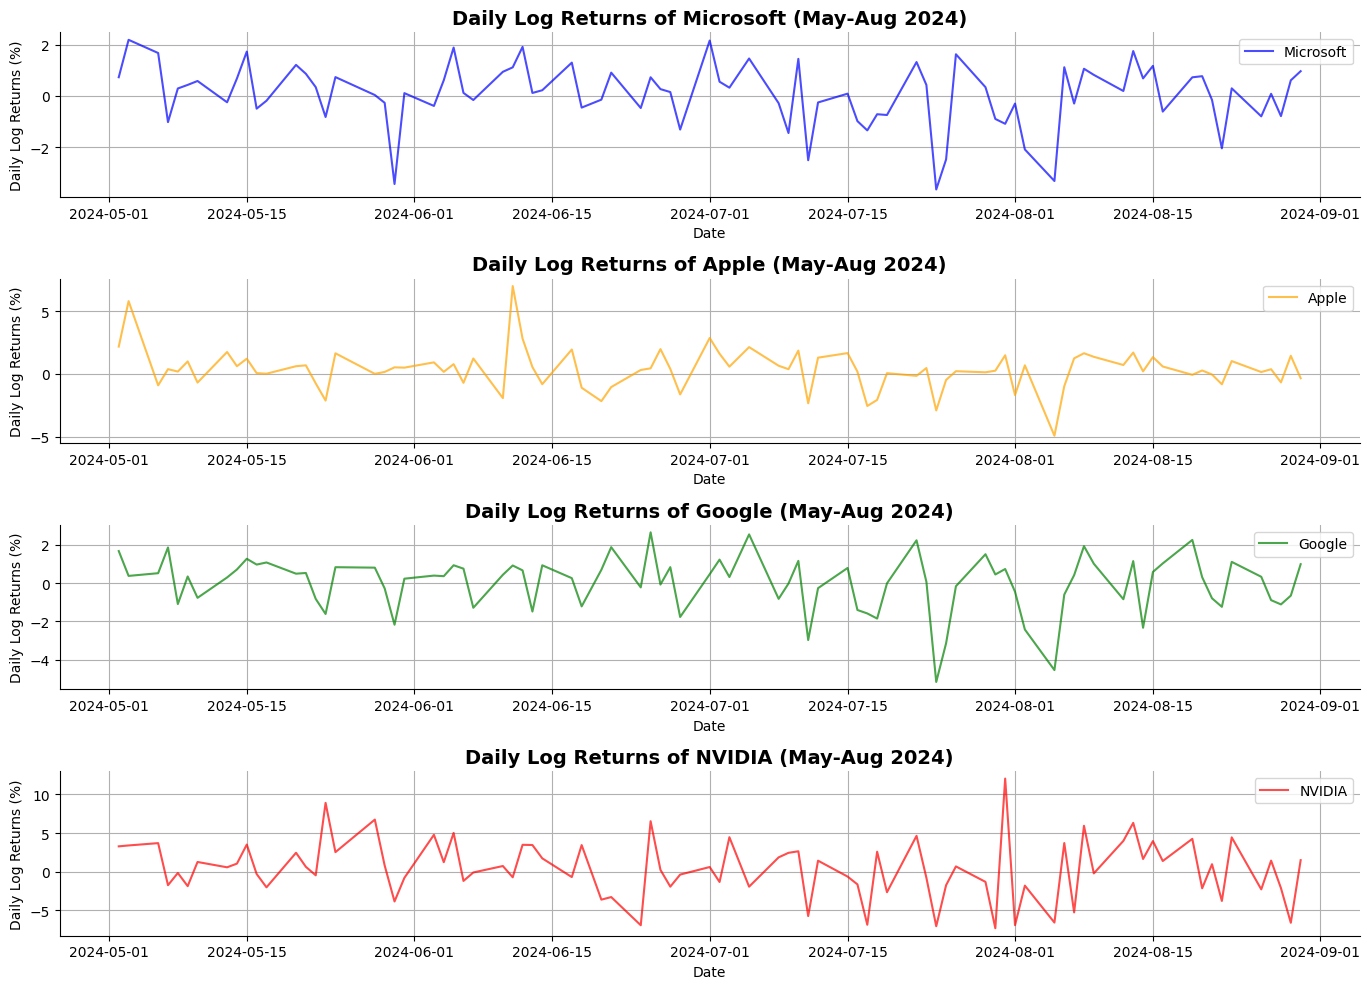

In [4]:
# Filter data from 2024-05-01 to 2024-08-31
data_recent = data.loc['2024-05-01':'2024-08-31']
# Calculate daily profit
daily_return = np.log(data_recent / data_recent.shift(1)).dropna()
colors = {
    'MSFT': 'blue',
    'AAPL': 'orange',
    'GOOGL': 'green',
    'NVDA': 'red'
}
plt.figure(figsize = (14, 10))
for i, (ticker, label) in enumerate(zip(tickers, labels), 1):
    plt.subplot(len(tickers), 1, i)
    # daily_return[ticker] multiple 100 to convert %
    plt.plot(daily_return[ticker] * 100, label = label, color = colors[ticker], alpha=0.7)
    plt.title(label, fontsize=14, fontweight='bold')
    plt.title(f'Daily Log Returns of {label} (May-Aug 2024)', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Daily Log Returns (%)')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    sns.despine()
plt.tight_layout()
plt.savefig('reports/daily_returns_may_aug_2024.png')
plt.show()

# **Cumulative Log Returns (May - Aug 2024)**

Cumulative log return represents the total logarithmic cumulative return of an asset over a period of time

This visualizes the relative performance between stocks over this time period.

Summary:


*   NVIDIA and Apple stocks have outperformed Microsoft and Google over that period.
*   NVIDIA and Apple's high volatility suggests higher risk than Microsoft and Google.

*   NVIDIA and Apple stocks have had the highest growth, at about 1.65 and 1.38.
*   Microsoft and Google stocks have had the highest growth, at about 1.18 and 1.16





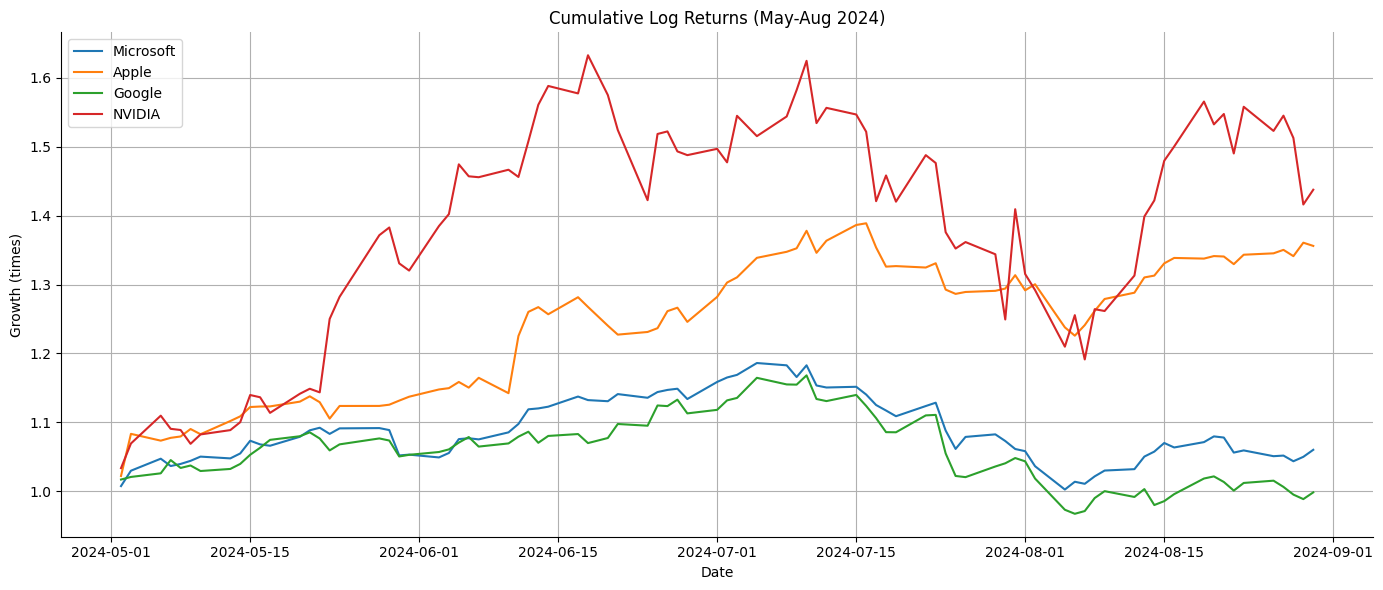

In [5]:
# Calculate cumulative log return from 2024-05-01 to 2024-08-31
cumulative_log_returns = daily_return.cumsum()
cumulative_growth = np.exp(cumulative_log_returns)
plt.figure(figsize=(14, 6))
for ticker, label in zip(tickers, labels):
    plt.plot(cumulative_growth[ticker], label=label)
plt.title("Cumulative Log Returns (May-Aug 2024)")
plt.xlabel("Date")
plt.ylabel("Growth (times)")
plt.legend()
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.savefig('reports/cumulative_log_returns_may_aug_2024.png')
plt.show()

# **Distribution of Daily Returns**

Kernel Density Estimation (KDE) plots provide a smooth estimate of the probability distribution of daily returns.

This helps understand the likelihood of different return magnitudes and the presence of extreme values.

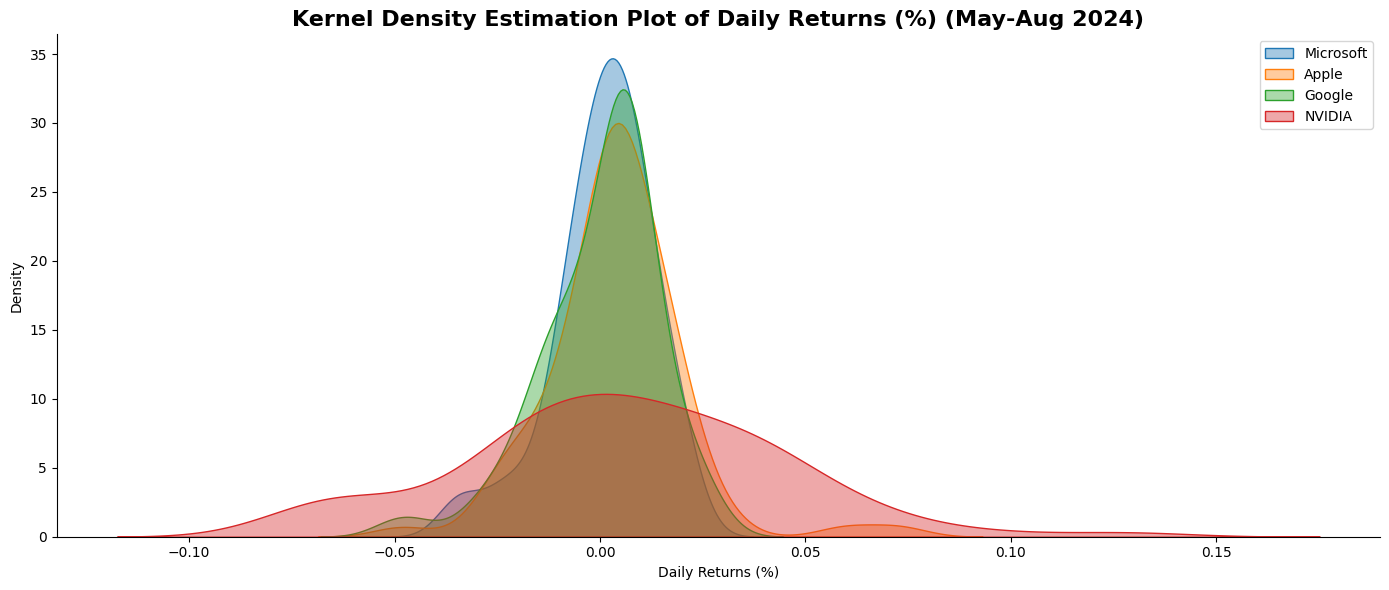

In [6]:
# Profit Distribution (Kernel Density Estimation Plot) from 2024-05-01 to 2024-08-31
plt.figure(figsize=(14, 6))
daily_return_simple = data_recent.pct_change().dropna()
for ticker, label in zip(tickers, labels):
    sns.kdeplot(daily_return_simple[ticker], label=label, fill=True, alpha=0.4)

plt.title('Kernel Density Estimation Plot of Daily Returns (%) (May-Aug 2024)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Density')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('reports/kde_daily_returns_may_aug_2024.png')
plt.show()

# **7-Day Rolling Volatility**

Volatility measures the degree of variation in stock profits over time.

Here, a 7-day rolling window is used to smooth daily fluctuations and observe trends in risk levels.

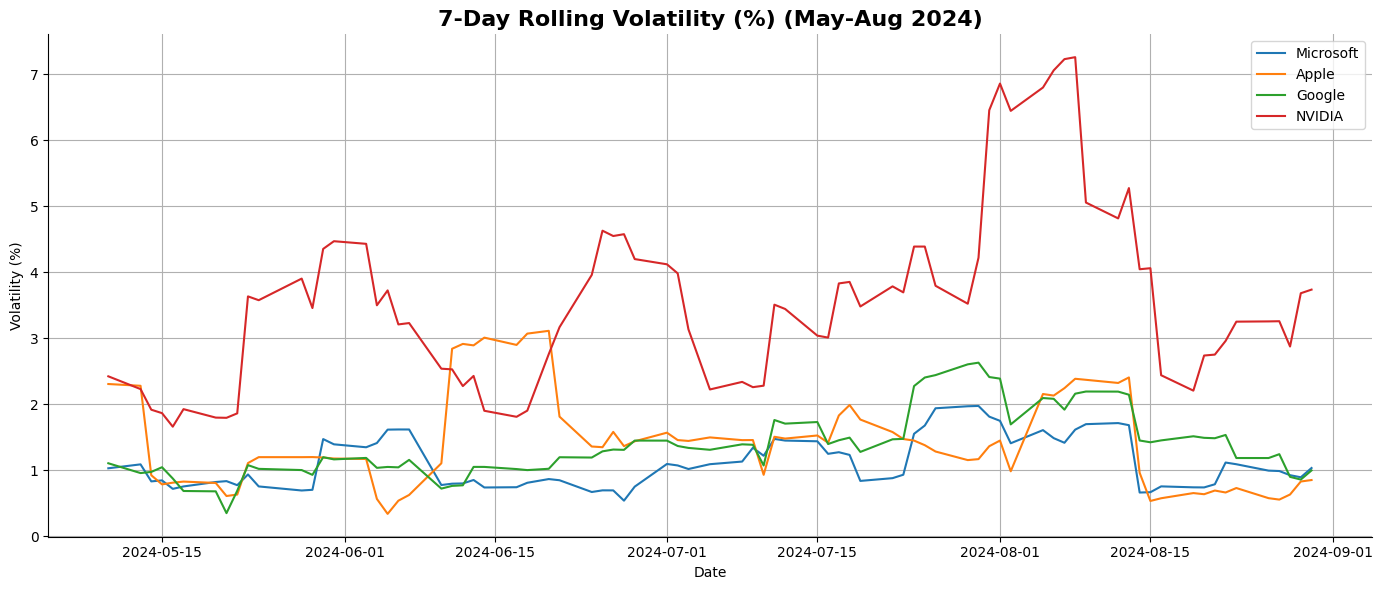

In [7]:
# Compute 7-day rolling volatility (standard deviation) from 2024-05-01 to 2024-08-31
# Multiply by 100 to express volatility as a percentage
rolling_volatility = daily_return.rolling(window=7).std() * 100

# Plot rolling volatility for each stock
plt.figure(figsize=(14, 6))
for ticker, label in zip(tickers, labels):
    plt.plot(rolling_volatility[ticker], label=label)

plt.title("7-Day Rolling Volatility (%) (May-Aug 2024)", fontsize = 16, fontweight = 'bold')
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.savefig('reports/rolling_volatility_may_aug_2024.png')
plt.show()

# **Stock Volatility Comparison**

This bar chart compares the standard deviation of daily profits across stocks, indicating relative riskiness.

Risk Assessment:


*   Stocks with high volatility often carry greater risk — prices are volatile, and profits can fluctuate.
*   Stocks with low volatility are more stable, suitable for investors who prefer safety.

Recommendation:


*   Investors consider volatility to decide capital allocation and risk management.
*   Investors can choose stocks with lower volatility or balance the portfolio to reduce total volatility.

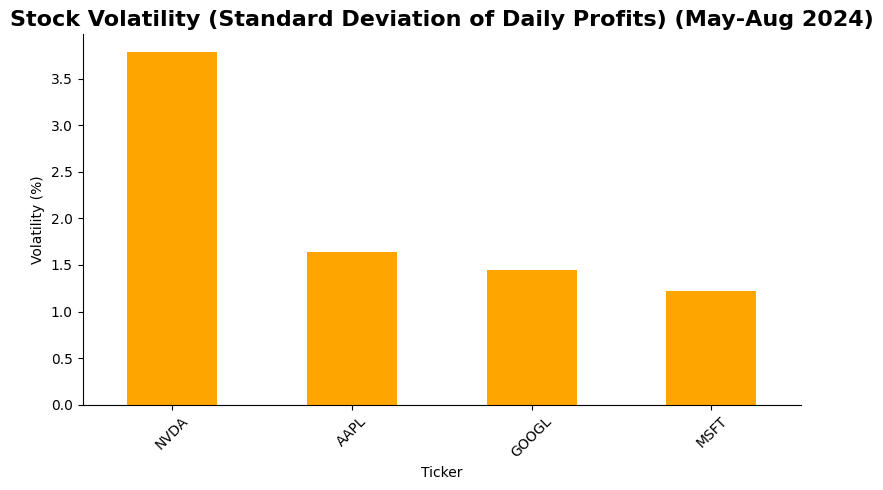

In [8]:
# Stock Volatility from 2024-05-01 to 2024-08-31
# multiple 100 to convert from decimal to %
volatility = daily_return.std() * 100
volatility.sort_values(ascending=False).plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Stock Volatility (Standard Deviation of Daily Profits) (May-Aug 2024)", fontsize = 16, fontweight = 'bold')
plt.ylabel("Volatility (%)")
plt.xticks(rotation = 45)
sns.despine()
plt.tight_layout()
plt.savefig('reports/volatility_bar_chart_may_aug_2024.png')
plt.show()

# **Correlation Matrix of Daily Profits**

Correlation coefficients show how stock profits move in relation to each other.

High positive correlation means stocks tend to move in the same direction.

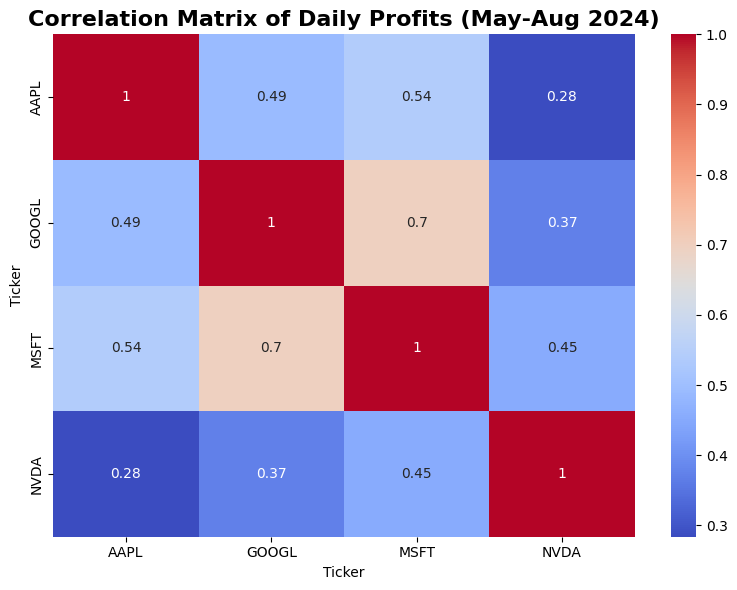

In [9]:
correlation = daily_return.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Profits (May-Aug 2024)', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.savefig('reports/correlation_heatmap_may_aug_2024.png')
plt.show()